# PT3S

In [1]:
#pip install PT3S -U --no-deps

# Imports

In [2]:
import os
import logging
import pandas as pd
import datetime
import numpy as np
import subprocess

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
from matplotlib.pyplot import Polygon
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter, MinuteLocator
import matplotlib.ticker as ticker

import ipywidgets as widgets
from ipywidgets import interact

from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, LinearAxis, Range1d
from bokeh.palettes import Spectral10

from IPython.display import Image

try:
    from PT3S import dxAndMxHelperFcts
except:
    import dxAndMxHelperFcts

try:
    from PT3S import Rm
except:
    import Rm

In [3]:
#import importlib

In [4]:
#importlib.reload(dxAndMxHelperFcts)

# Logging

In [5]:
logger = logging.getLogger()  

logFileName= r"Example3.log" 

loglevel = logging.DEBUG
logging.basicConfig(filename=logFileName
                        ,filemode='w'
                        ,level=loglevel
                        ,format="%(asctime)s ; %(name)-60s ; %(levelname)-7s ; %(message)s")    

fileHandler = logging.FileHandler(logFileName)     

logger.addHandler(fileHandler)

consoleHandler = logging.StreamHandler()
consoleHandler.setFormatter(logging.Formatter("%(levelname)-7s ; %(message)s"))
consoleHandler.setLevel(logging.INFO)
logger.addHandler(consoleHandler)

# Read Model and Results

In [6]:
dbFilename="Example3"
dbFile=os.path.join(os.path.dirname(os.path.abspath(dxAndMxHelperFcts.__file__))
                    +'/Examples/'
                    +dbFilename
                    +'.db3'
)

In [7]:
m=dxAndMxHelperFcts.readDxAndMx(dbFile=dbFile                                 
                                ,preventPklDump=True
                                ,maxRecords=-1
)

INFO    ; Dx.__init__: dbFile (abspath): c:\users\aUserName\3s\pt3s\Examples\Example3.db3 exists readable ...
INFO    ; dxAndMxHelperFcts.readDxAndMx: 
+..\Examples\Example3.db3 is newer than
+..\Examples\WDExample3\B1\V0\BZ1\M-1-0-1.1.MX1:
+SIR 3S' dbFile is newer than SIR 3S' mx1File
+in this case the results are maybe dated or (worse) incompatible to the model
INFO    ; dxAndMxHelperFcts.readDxAndMx: 
+..\Examples\WDExample3\B1\V0\BZ1\M-1-0-1.XML is newer than
+..\Examples\WDExample3\B1\V0\BZ1\M-1-0-1.1.MX1:
+SirCalc's xmlFile is newer than SIR 3S' mx1File
+in this case the results are maybe dated or (worse) incompatible to the model
INFO    ; dxAndMxHelperFcts.readDxAndMx: running C:\\3S\SIR 3S\SirCalc-90-14-02-10_Potsdam\SirCalc.exe ...
INFO    ; Mx.setResultsToMxsFile: Mxs: ..\Examples\WDExample3\B1\V0\BZ1\M-1-0-1.1.MXS reading ...
INFO    ; dxWithMx.__init__: Example3: processing dx and mx ...


In [8]:
m.V3_AGSN.shape,m.dfAGSN.shape

((537, 47), (528, 10))

# Longitudinal Sections: V3_AGSN

In [9]:
#m.V3_AGSN

In [10]:
#m.dfAGSN

In [11]:
m.dfAGSN.columns.to_list()

['Pos', 'TYPE', 'ID', 'pk', 'tk', 'LFDNR', 'NAME', 'XL', 'compNr', 'nextNODE']

In [12]:
m.V3_AGSN.columns.to_list()

['Pos',
 'pk',
 'tk',
 'LFDNR',
 'NAME',
 'XL',
 'compNr',
 'nextNODE',
 'OBJTYPE',
 'OBJID',
 'L',
 'DN',
 'Am2',
 'Vm3',
 'NAME_CONT',
 'NAME_i',
 'NAME_k',
 'ZKOR_n',
 'BESCHREIBUNG_n',
 'KVR_n',
 'LSum',
 'direction',
 "('STAT', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n",
 "('TIME', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n",
 "('TMIN', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n",
 "('TMAX', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n",
 "('STAT', 'KNOT~*~*~*~H', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n",
 "('TIME', 'KNOT~*~*~*~H', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n",
 "('TMIN', 'KNOT~*~*~*~H', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n",
 "('TMAX', 'KNOT~*~*~*~H', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-1

# Section No. 1

In [13]:
dfAGSN=m.V3_AGSN[
    (m.V3_AGSN['LFDNR']==1)
    &
    (m.V3_AGSN['XL']==1)
]
colsAGSNBase=['LFDNR','XL','Pos']+['OBJTYPE'
                                   ,'OBJID'
                                   ,'DN'
                                   #,'Am2','Vm3'
                                   #,'NAME_CONT'
                                   ,'NAME_i','NAME_k']+['QM','direction']+['L','LSum']

#dfAGSN[colsAGSNBase+['nextNODE','PH_n']]

In [14]:
dfAGSNRL=m.V3_AGSN[
    (m.V3_AGSN['LFDNR']==1)
    &
    (m.V3_AGSN['XL']==2)
]
#dfAGSNRL[colsAGSNBase+['nextNODE','PH_n']]

# Plot

## Define Axes

In [15]:
def fyPH(ax,offset=0):
    ax.spines["left"].set_position(("outward", offset))
    ax.set_ylabel('PH Druck in bar')
    #ax.set_ylim(1,6)
    #ax.set_yticks(sorted(np.append(np.linspace(1,6,11),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')
    
def fymlc(ax,offset=60):
    ax.spines["left"].set_position(("outward", offset))
    ax.set_ylabel('mlc Druckhöhe in mlc')
    #ax.set_ylim(1,6)
    #ax.set_yticks(sorted(np.append(np.linspace(1,6,11),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')
    
def fybarBzg(ax,offset=120):
    ax.spines["left"].set_position(("outward", offset))
    ax.set_ylabel('H Druck in barBzg')
    #ax.set_ylim(1,6)
    #ax.set_yticks(sorted(np.append(np.linspace(1,6,11),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')

def fyM(ax,offset=180):
    Rm.pltLDSHelperY(ax)
    ax.spines["left"].set_position(("outward",offset))
    ax.set_ylabel('QM Massenstrom in t/h')
    #ax.set_ylim(500,550)
    #ax.set_yticks(sorted(np.append(np.linspace(500,550,11),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')
    
def fyT(ax,offset=240):
    Rm.pltLDSHelperY(ax)
    ax.spines["left"].set_position(("outward",offset))
    ax.set_ylabel('T Tempertatur in °C')
    ax.set_ylim(55,95)
    #ax.set_yticks(sorted(np.append(np.linspace(0,95,11),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')
    
 

## Plotfunction

In [16]:
def plot(ax0        
        ,dfAGSN=pd.DataFrame()
        ,dfAGSNRL=pd.DataFrame()
        ,title='Longitudinal Section'
        ,PHCol='PH_n'
        ,mlcCol='mlc_n'
        ,zKoorCol='ZKOR_n'
        ,barBzgCol='H_n'
        ,QMCol='QM'
        ,TCol='T_n'
        ,xCol='LSum'
        
):
                       
    ax0.set_yticks(np.linspace(0, 10, 21))
    ax0.yaxis.set_ticklabels([])
    ax0.grid()

    #PH
    ax1 = ax0.twinx()     
    fyPH(ax1) 
    PH_SL=ax1.plot(dfAGSN[xCol], dfAGSN[PHCol], color='red', label='PH SL',ls='dotted')
    PH_RL=ax1.plot(dfAGSNRL[xCol], dfAGSNRL[PHCol], color='blue', label='PH RL',ls='dotted')
    
    #mlc
    ax11 = ax0.twinx()     
    fymlc(ax11) 
    mlc_SL=ax11.plot(dfAGSN[xCol], dfAGSN[mlcCol], color='red', label='mlc SL')
    mlc_RL=ax11.plot(dfAGSNRL[xCol], dfAGSNRL[mlcCol], color='blue', label='mlc RL')
    
    z=ax11.plot(dfAGSN[xCol], dfAGSN[zKoorCol], color='black', label='z',ls='dashed',alpha=.5)
    
    #barBZG
    ax12 = ax0.twinx()     
    fybarBzg(ax12) 
    barB_SL=ax12.plot(dfAGSN[xCol], dfAGSN[barBzgCol], color='red', label='H SL',ls='dashdot')
    barB_RL=ax12.plot(dfAGSNRL[xCol], dfAGSNRL[barBzgCol], color='blue', label='H RL',ls='dashdot')
    
    #M
    ax2 = ax0.twinx()     
    fyM(ax2)
    QM_SL=ax2.step(dfAGSN[xCol], dfAGSN[QMCol]*dfAGSN['direction'], color='orange', label='M SL')
    QM_RL=ax2.step(dfAGSNRL[xCol], dfAGSNRL[QMCol]*dfAGSNRL['direction'], color='cyan', label='M RL',ls='--')
    
    #T
    ax3 = ax0.twinx() 
    fyT(ax3)
    T_SL=ax3.plot(dfAGSN[xCol], dfAGSN[TCol], color='pink', label='T SL')
    T_RL=ax3.plot(dfAGSNRL[xCol], dfAGSNRL[TCol], color='lavender', label='T RL')
    
    ax0.set_title(title)

    # legend
    lns =  PH_SL+ PH_RL + mlc_SL+ mlc_RL + barB_SL+ barB_RL+ QM_SL+ QM_RL + T_SL+ T_RL + z
    labs = [l.get_label() for l in lns]
    ax0.legend(lns, labs)
    
    

## Plot

KeyError: 'QM'

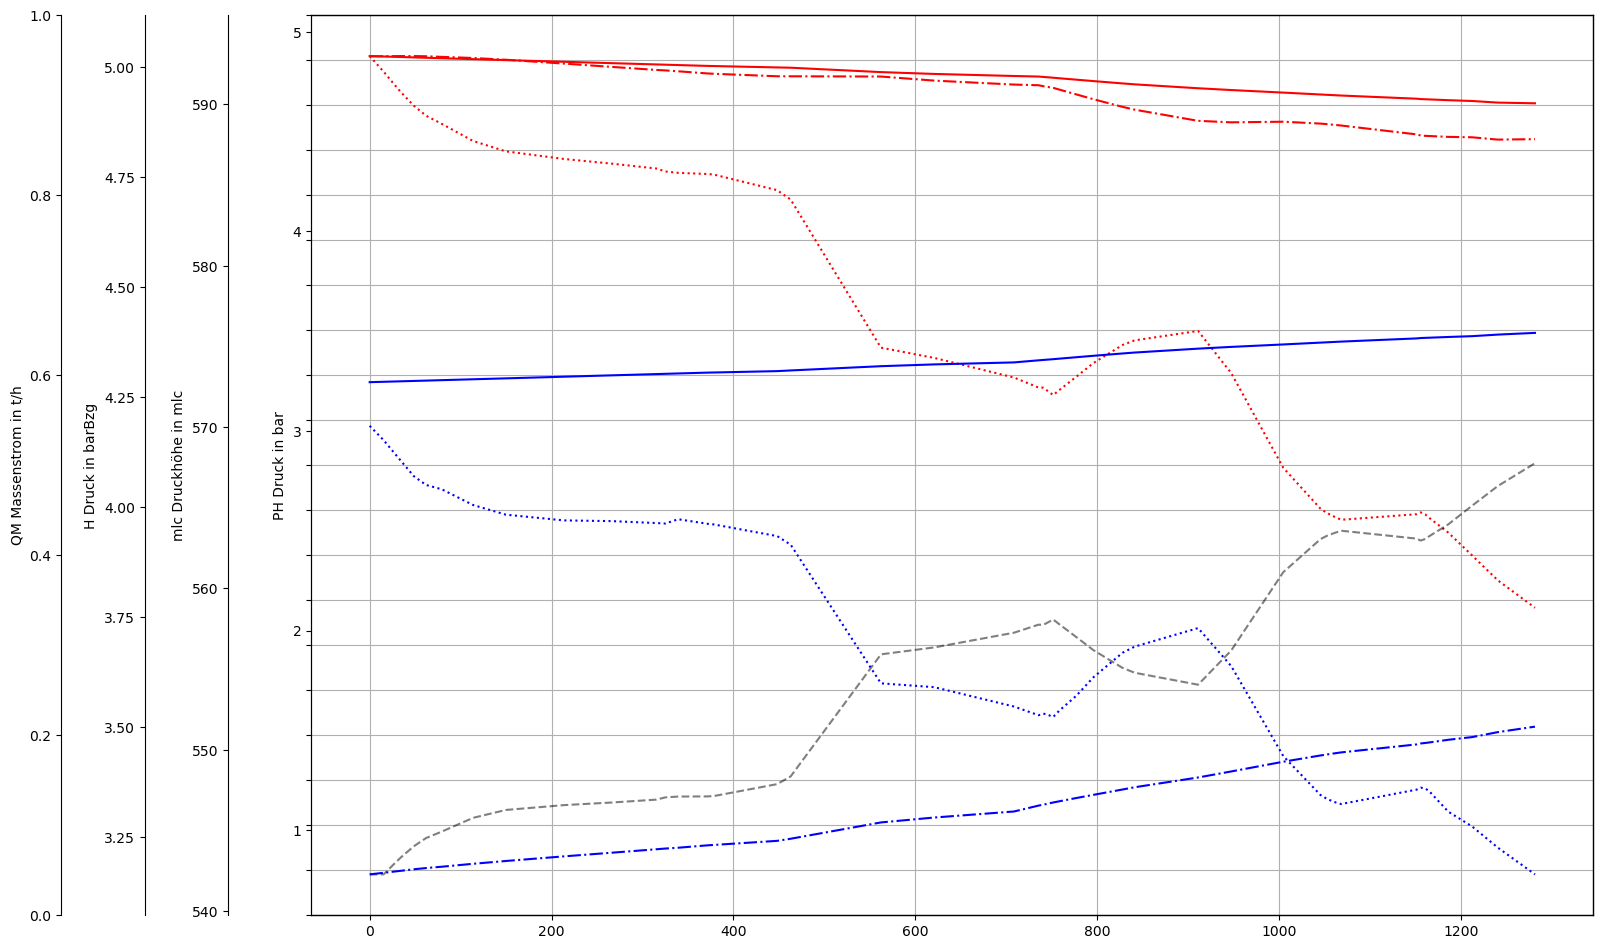

In [17]:
fig, ax0 = plt.subplots(figsize=Rm.DINA3q)

plot(ax0,dfAGSN,dfAGSNRL)

# V3_AGSN: Columns

In [ ]:
m.V3_AGSN.columns.to_list()

# V3_ROHRVEC (pipe interior points): Columns

In [ ]:
m.V3_ROHRVEC.columns.to_list()

In [ ]:
m.V3_ROHRVEC.shape

In [ ]:
pd.set_option('display.max_rows', None)

# V3_AGSNVec: Longitudinal Sections with pipe interior points: Columns

In [ ]:
dfAGSNVec=m.V3_AGSNVEC

In [ ]:
#dfAGSNVec.head()

In [ ]:
dfAGSNVec.columns.to_list()

# V3_AGSNVec's columns from Multiindex-perspective

In [ ]:
dfAGSNVec=dfAGSNVec.copy(deep=True)

In [ ]:
dfAGSNVec.columns=pd.MultiIndex.from_tuples(
                [dxAndMxHelperFcts.fGetMultiindexTupleFromV3Col(col) for col in dfAGSNVec.columns.to_list()]
                ,names=['1','2','3','4'])   

In [ ]:
sorted([col for col in list(set(dfAGSNVec.columns.get_level_values(level=1).to_list())) if not pd.isnull(col)])

In [ ]:
sorted([col for col in list(set(dfAGSNVec.columns.get_level_values(level=0).to_list())) if not pd.isnull(col)])

In [ ]:
sorted([col for col in list(set(dfAGSNVec.columns.get_level_values(level=2).to_list())) if not pd.isnull(col)])

In [ ]:
sorted([col for col in list(set(dfAGSNVec.columns.get_level_values(level=3).to_list())) if not pd.isnull(col)])

# Examination of V3_AGSNVec

In [ ]:
#m.V3_AGSNVEC.head()

In [ ]:
m.V3_AGSNVEC['IptIdx'].unique()

## Section No. 1

In [ ]:
dfAGSNVec=m.V3_AGSNVEC[
    (m.V3_AGSNVEC['LFDNR']==1)
    &
    (m.V3_AGSNVEC['XL']==1)
]


In [ ]:
dfAGSNVecRL=m.V3_AGSNVEC[
 (m.V3_AGSNVEC['LFDNR']==1)
    &
    (m.V3_AGSNVEC['XL']==2)
]

In [ ]:
#dfAGSN[colsAGSNBase+['nextNODE','PH_n','mlc_n','T_n']]

In [ ]:
#dfAGSNVec[colsAGSNBase+['nextNODE','PH_n','mlc_n','T_n']+['IptIdx','IptIdxAsNo','SVEC','ZKOR_n']]

## Plot

In [ ]:
fig, axs = plt.subplots(nrows=3,ncols=1,figsize=Rm.DINA3)

plot(axs[0],dfAGSN,dfAGSNRL,title='Longitudinal Section based on V3_AGSN')
plot(axs[1],dfAGSNVec[dfAGSNVec['IptIdx'].isin(['S','E'])],dfAGSNVecRL[dfAGSNVecRL['IptIdx'].isin(['S','E'])],title='Longitudinal Section based on V3_AGSNVEC (interior points filtered)')
plot(axs[2],dfAGSNVec,dfAGSNVecRL,title='Longitudinal Section based on V3_AGSNVEC')

dfAGSNVecAnzIptx=dfAGSNVec.groupby(by=['LFDNR','XL','OBJID'])['Pos'].count()
for index,row in dfAGSNVec.iterrows():
    pass
    if row['Pos']==0:
        continue
    if dfAGSNVecAnzIptx.loc[(row['LFDNR'],row['XL'],row['OBJID'])]>=2:
        axs[2].axvline(x=row['LSum'],c='silver')